# Példa 7.1

Határozzuk meg a végkeresztmetszet függőleges elmozdulását!

a) Az alakváltozási energia számításakor hanyagoljuk el a normál igénybevétel hatását;

b) Vegyük figyelembe a normál igénybevétel hatását is!

<img src="7.1.png" style="width: 400px;">

# Megoldás

Betöltjük a `sympy` modult. Definiáljuk a szimbólumokat.

In [1]:
import sympy as sp
sp.init_printing()

F, R, φ, I, E, A = sp.symbols('F, R, φ, I, E, A') #φ: \varphi + tab


## a) feladat

Az alakváltozási energia:
$$U=U_{Mh}.$$

A hajlító igénybevétel $\varphi$ koordináta szerint:
$$M_h(\varphi)=F R (1-\cos \varphi).$$

A csak hajlítást figyelembe vévő esetben az elmozdulást a következő integrál meghatározásával kapjuk:
$$f_h= \frac{\partial U}{\partial F}=\frac{1}{I E}\int_{0}^{\pi} M_h \frac{\partial M_h}{\partial F} R \mathrm{d}\varphi.$$

A korábban haszált `.diff(x)` utasítás használható parciális deriváltak előállításához, hiszen csak `x` szerint derivál.

In [2]:
Mh = F*R*(1-sp.cos(φ))
Mhparcder = Mh.diff(F)
Mhparcder

A `sympy`-ban integrálni az `integrate(kifejezes, valtozo)` utasítással tudunk. Határozott integrál számításához meg kell adnunk a határokat is a következő szintaktikával: `integrate(kifejezes, (valtozo, also_hatar, felso_hatar))`.

Megjegyzés: az integrálás határa lehet $\infty$. Ez `sp.oo`-ként adhatjuk meg (ha a `sp` néven töltöttük be a `sympy`-t).

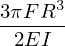

In [3]:
fh = 1/(I*E)*sp.integrate(Mh*Mhparcder*R,(φ, 0, sp.pi))
fh

## b) feladat

Az alakváltozási energia:
$$U=U_{Mh}+U_N.$$

Az elmozdulás a normálerőt is figyelembe véve:
$$f_{hN}= \frac{\partial U}{\partial F}=\frac{\partial U_{Mh}}{\partial F}+\frac{\partial U_N}{\partial F},$$
ahol felhaszálhatjuk az a) feladatrész eredményét, hiszen:
$$\frac{\partial U_{Mh}}{\partial F}=f_h.$$

A normál igénybevétel $\varphi$ szerint:
$$N(\varphi)=F \cos(\varphi).$$

A következő integrált kell kiszámítanunk:
$$f_N=\frac{\partial U_N}{\partial F}=\frac{1}{E A}\int_{0}^{\pi} N \frac{\partial N}{\partial F} R \mathrm{d}\varphi.$$

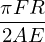

In [4]:
N = F*sp.cos(φ)
Nparcder = N.diff(F)
fN = 1/(E*A)*sp.integrate(N*Nparcder*R,(φ, 0, sp.pi))
fN

A normál és hajlító igénybevételből származó elmozdulás:
$$f_{hN}=f_h+f_N.$$

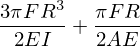

In [5]:
fhN = fh + fN
fhN